# 1차원 데이터의 정리

## 데이터 중심의 지표

In [1]:
import numpy as np
import pandas as pd

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('display.precision', 3)

In [2]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')
# df의 처음 5행을 표시
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
scores = np.array(df['english'])[:10]
scores  # numpy 배열

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [4]:
scores_df = pd.DataFrame({'score': scores}, index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 평균값

In [5]:
sum(scores) / len(scores)

55.000

In [6]:
# numpy
np.mean(scores)

55.000

In [7]:
# pandas
scores_df.mean()

score    55.0
dtype: float64

### 중앙값

In [8]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [9]:
n = len(sorted_scores)
if n % 2:
    median = sorted_scores[(n+1) // 2 - 1]
else:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
median

56.500

In [10]:
np.median(scores)  # 정렬 필요 X

56.500

In [11]:
scores_df.median()  # 정렬 필요 X

score    56.5
dtype: float64

### 최빈값

In [12]:
scores_df.mode()

,score
0,65


In [13]:
sample_series = pd.Series([1,1,1,2,2,3])
sample_series.mode()

0    1
dtype: int64

## 데이터의 산포도 지표

### 분산과 표준편차

#### 편차 (deviation)

In [14]:

mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [15]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
a_deviation = another_scores - np.mean(another_scores)
a_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [16]:
np.mean(deviation)

0.000

In [17]:
np.mean(a_deviation)

0.000

In [18]:
summary_df = scores_df.copy()
# 'deviation' 열을 추가하고, 데이터로 numpy array 를 넣는다.
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [19]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

#### 분산 (Variance)

In [20]:
np.mean(deviation ** 2)

86.000

In [21]:
np.var(scores)

86.000

In [22]:
scores_df.var(ddof=0)

score    86.0
dtype: float64

In [23]:
print(deviation, np.square(deviation))
summary_df['dev ** 2'] = np.square(deviation)
summary_df

[-13.  14.   1. -14.   2.  -7.  10.  -6.  10.   3.] [169. 196.   1. 196.   4.  49. 100.  36. 100.   9.]


,score,deviation,dev ** 2
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [24]:
summary_df.mean()

score        55.0
deviation     0.0
dev ** 2     86.0
dtype: float64

#### 표준편차 (Standard Deviation)

In [25]:
# 분산 (표본분산 => flag ddof=0)
var = np.var(scores, ddof=0)

# var ** 0.5  # => 루트
np.sqrt(var)

9.274

In [26]:
np.std(scores, ddof=0)

9.274

### 범위와 4분위수 범위

#### 범위

In [29]:
np.max(scores) - np.min(scores)

28

#### 4분위수 범위

In [37]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR  # InterQuartile Range

15.000

### 데이터의 지표 정리

In [43]:
s = pd.Series(scores)
s.describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

In [45]:
df.describe()

,english,mathematics
count,50.00,50.000
mean,58.38,78.880
std,9.80,8.414
min,37.00,57.000
25%,54.00,76.000
50%,57.50,80.000
75%,65.00,84.000
max,79.00,94.000


## 데이터의 정규화 (Normalization)

### 표준화

In [56]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [55]:
np.mean(z), np.std(z, ddof=0)

(-0.000, 1.000)

### 편차값

In [60]:
z = 50 + (10 * (scores - np.mean(scores)) / np.std(scores))
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [64]:
scores_df['dev val'] = z
scores_df

,score,dev val
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


## 데이터의 시각화

In [69]:
# 50명의 영어 점수 Numpy array
english_scores = np.array(df['english'])
# Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

### 도수분포표 (Frequency Distribution)

In [75]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [80]:
# 0~10, 10~20, ... 이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency(도수)': freq}, index=pd.Index(freq_class, name='class(계급)'))

freq_dist_df

,frequency(도수)
class(계급),
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [89]:
# 계급값
class_value = [(i + (i+10)) // 2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [88]:
# 상대도수
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [91]:
# 누적 상대도수
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [96]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency(도수)',
                             'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency(도수),relative frequency,cumulative relative frequency
class(계급),,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


#### 최빈값 재검토

In [101]:
# 도수의 최대값이 속한 index
idxmax = freq_dist_df['frequency(도수)'].idxmax()

# idxmax를 idx로 가지는 row의 'class value' col 값
freq_dist_df.loc[idxmax, 'class value']

65

### 히스토그램

In [104]:
# Matplotlib의 pyplot 모듈을 plt라는 이름으로 임포트
import matplotlib.pyplot as plt

# 그래프가 notebook 위에 표시
%matplotlib inline

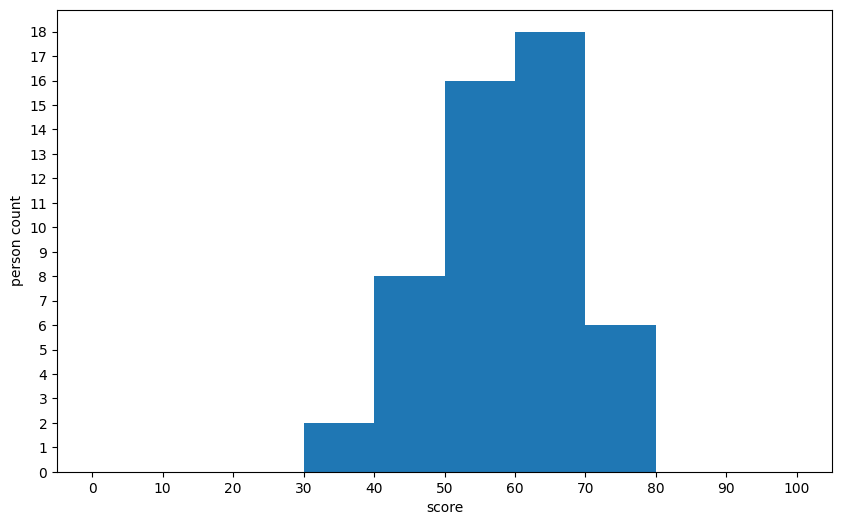

In [128]:
# 캔버스를 생성
# figsize로 가로・세로 크기를 지정
fig = plt.figure(figsize=(10, 6))

# 캔버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))

# X축에 레이블 부여
ax.set_xlabel('score')
# Y축에 레이블 부여
ax.set_ylabel('person count')
# X축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
# Y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))

# 그래프 표시
plt.show()

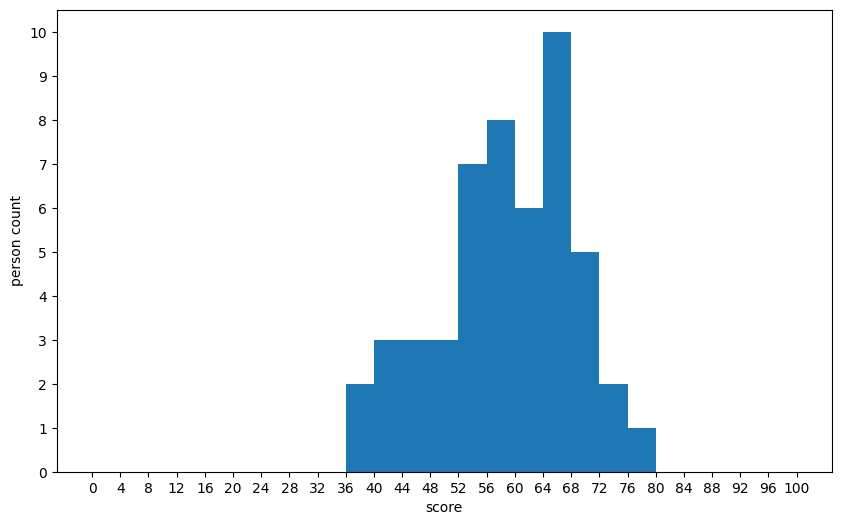

In [129]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# 계급수를 25으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins=25, range=(0, 100))

ax.set_xlabel('score')
ax.set_ylabel('person count')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

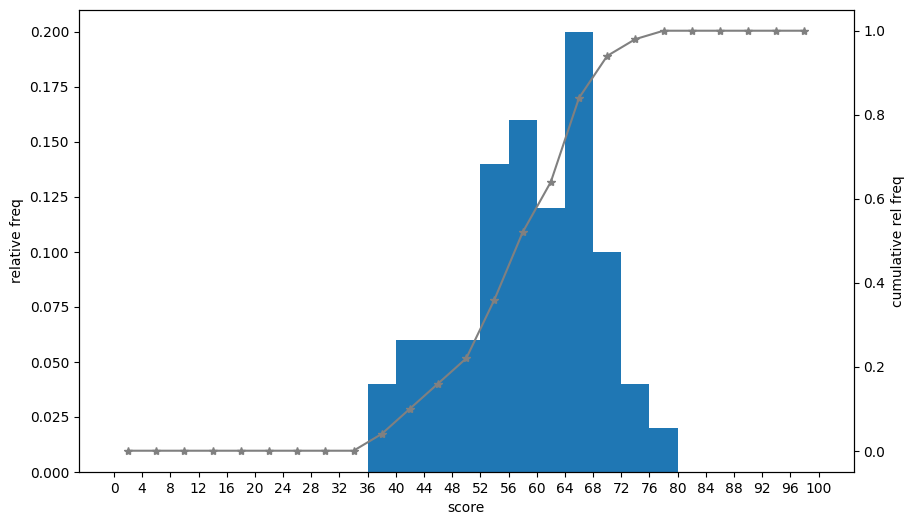

In [159]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성 (X축은 공유한다.)
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0, 100), weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]

# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그람
# 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq, ls='-', marker='*', color='gray')
# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative freq')
ax2.set_ylabel('cumulative rel freq')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

### 상자 그림

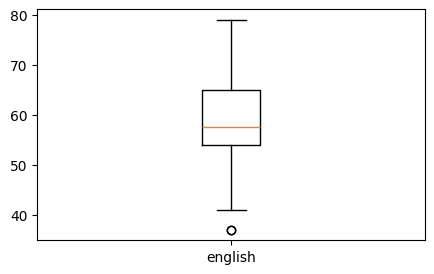

In [168]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])
plt.show()